### Packages

In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
#style for the plot
plt.style.use('ggplot')
#number of column shown when display a data frame
#pd.set_option('max_columns', 200)

In [106]:
df = pd.read_csv(r"C:\Users\yarde\OneDrive\שולחן העבודה\Projects\Data\coaster_db.csv")
df.shape

(1087, 56)

In [107]:
df.head(3)

,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,...,speed1,speed2,speed1_value,speed1_unit,speed_mph,height_value,height_unit,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,600 ft (180 m),6 mph (9.7 km/h),Coney Island,Removed,"June 16, 1884",Wood,LaMarcus Adna Thompson,NaN,Lift Packed,...,6 mph,9.7 km/h,6.0,mph,6.0,50.0,ft,NaN,0,2.9
1,Flip Flap Railway,NaN,NaN,Sea Lion Park,Removed,1895,Wood,Lina Beecher,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",Closed,NaN,Other,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


In [108]:
df.describe()

,Inversions,year_introduced,latitude,longitude,speed1_value,speed_mph,height_value,height_ft,Inversions_clean,Gforce_clean
count,932.000000,1087.000000,812.000000,812.000000,937.000000,937.000000,965.000000,171.000000,1087.000000,362.000000
mean,1.547210,1994.986201,38.373484,-41.595373,53.850374,48.617289,89.575171,101.996491,1.326587,3.824006
std,2.114073,23.475248,15.516596,72.285227,23.385518,16.678031,136.246444,67.329092,2.030854,0.989998
min,0.000000,1884.000000,-48.261700,-123.035700,5.000000,5.000000,4.000000,13.100000,0.000000,0.800000
25%,0.000000,1989.000000,35.031050,-84.552200,40.000000,37.300000,44.000000,51.800000,0.000000,3.400000
50%,0.000000,2000.000000,40.289800,-76.653600,50.000000,49.700000,79.000000,91.200000,0.000000,4.000000
75%,3.000000,2010.000000,44.799600,2.778100,63.000000,58.000000,113.000000,131.200000,2.000000,4.500000
max,14.000000,2022.000000,63.230900,153.426500,240.000000,149.100000,3937.000000,377.300000,14.000000,12.000000


### Data Preperation

In [109]:
df.columns

Index(['coaster_name', 'Length', 'Speed', 'Location', 'Status', 'Opening date',
       'Type', 'Manufacturer', 'Height restriction', 'Model', 'Height',
       'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
       'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
       'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
       'Track layout', 'Fastrack available', 'Soft opening date.1',
       'Closing date', 'Opened', 'Replaced by', 'Website',
       'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
       'Single rider line available', 'Restraint Style',
       'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'year_introduced', 'latitude', 'longitude', 'Type_Main',
       'opening_date_clean', 'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph', 'height_value', 'height_unit', 'height_ft',
       'Inversions_clean', 'Gforce_clean'],
      dtype='object')

In [110]:
df = df[['coaster_name','Location','Status','Manufacturer','year_introduced','latitude','longitude',\
         'Type_Main','opening_date_clean','speed_mph','height_ft','Inversions_clean', 'Gforce_clean']].copy()

In [111]:
df.dtypes

coaster_name           object
Location               object
Status                 object
Manufacturer           object
year_introduced         int64
latitude              float64
longitude             float64
Type_Main              object
opening_date_clean     object
speed_mph             float64
height_ft             float64
Inversions_clean        int64
Gforce_clean          float64
dtype: object

In [112]:
df['opening_date_clean'] = pd.to_datetime(df['opening_date_clean'])
    
df.rename(columns={'coaster_name':'Coaster_Name',
                   'year_introduced':'Year_Introduced',
                   'latitude':'Latitude',
                   'longitude':'Longitude',
                   'opening_date_clean':'Opening_Date',
                   'speed_mph':'Speed_mph',
                   'Inversions_clean':'Inversions_Clean',
                   'Gforce_clean':'Gforce_Clean'}, inplace=True)

In [113]:
df.isna().sum()

Coaster_Name          0
Location              0
Status              213
Manufacturer         59
Year_Introduced       0
Latitude            275
Longitude           275
Type_Main             0
Opening_Date        250
Speed_mph           150
height_ft           916
Inversions_Clean      0
Gforce_Clean        725
dtype: int64

In [114]:
df.duplicated().sum()
df.loc[df.duplicated()]
#no duplicated values

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,Latitude,Longitude,Type_Main,Opening_Date,Speed_mph,height_ft,Inversions_Clean,Gforce_Clean


In [115]:
#check if this column has duplicated
df.loc[df.duplicated(subset=["Coaster_Name"])].head()

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,Latitude,Longitude,Type_Main,Opening_Date,Speed_mph,height_ft,Inversions_Clean,Gforce_Clean
43,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1927,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0
60,Derby Racer,Revere Beach,Removed,Fred W. Pearce,1937,42.4200,-70.9860,Wood,1911-01-01,NaN,NaN,0,NaN
61,Blue Streak (Conneaut Lake),Conneaut Lake Park,Closed,NaN,1938,41.6349,-80.3180,Wood,1938-05-23,50.0,NaN,0,NaN
167,Big Thunder Mountain Railroad,Other,NaN,Arrow Development (California and Florida)Dyna...,1980,NaN,NaN,Steel,NaT,35.0,NaN,0,NaN
237,Thunder Run (Canada's Wonderland),Canada's Wonderland,Operating,Mack Rides,1986,43.8427,-79.5423,Steel,1981-05-23,39.8,32.8,0,NaN


In [116]:
# Checking an example duplicate
df.query('Coaster_Name == "Crystal Beach Cyclone"')
#taken off and put back so the year is different

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,Latitude,Longitude,Type_Main,Opening_Date,Speed_mph,height_ft,Inversions_Clean,Gforce_Clean
39,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1926,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0
43,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1927,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0


In [117]:
df.duplicated(subset=['Coaster_Name', 'Location', 'Opening_Date']).sum()

97

In [118]:
df = df.loc[~df.duplicated(subset=['Coaster_Name', 'Location', 'Opening_Date'])].reset_index(drop=True).copy()

### Data Overview

In [120]:
df['Year_Introduced'].value_counts()

Year_Introduced
1999    46
2000    45
1998    30
2001    29
2002    28
        ..
1956     1
1959     1
1961     1
1895     1
1884     1
Name: count, Length: 101, dtype: int64

Text(0, 0.5, 'Count')

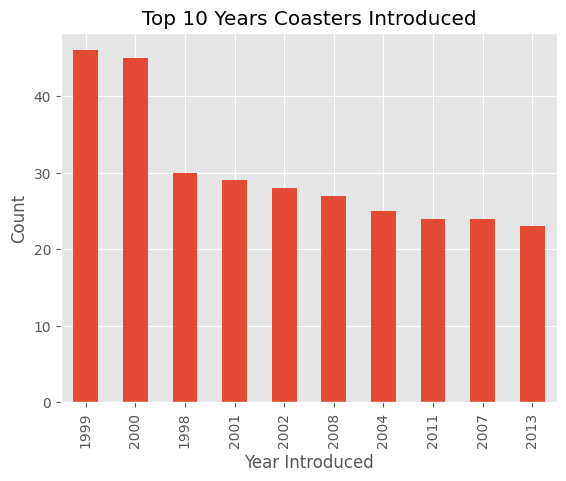

In [126]:
ax = df['Year_Introduced'].value_counts().head(10) \
    .plot(kind='bar', title='Top 10 Years Coasters Introduced')
ax.set_xlabel('Year Introduced')
ax.set_ylabel('Count')

Text(0.5, 0, 'Speed (mph)')

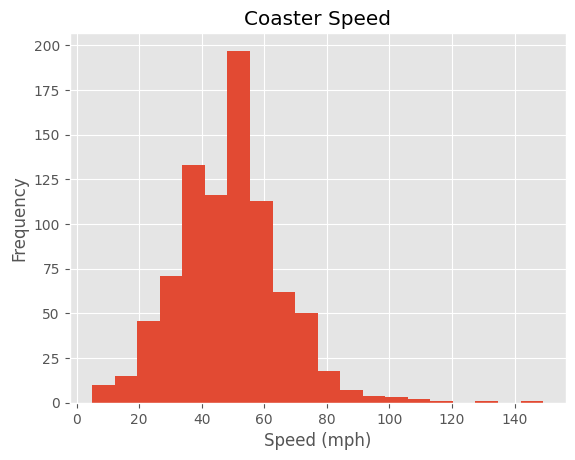

In [131]:
ax = df['Speed_mph'].plot(kind='hist', bins=20, title='Coaster Speed')
ax.set_xlabel("Speed (mph)")

Text(0.5, 0, 'Speed (mph)')

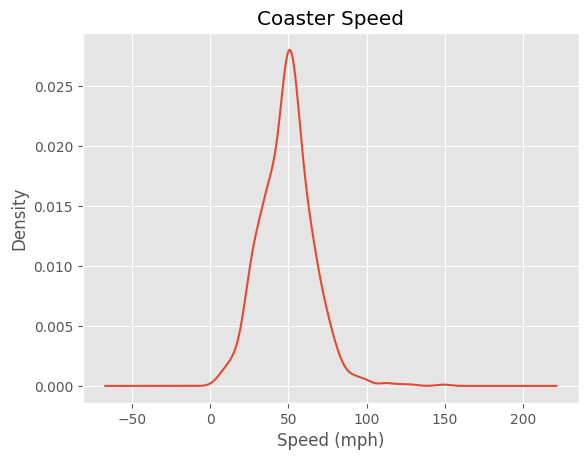

In [142]:
ax = df['Speed_mph'].plot(kind='kde', title='Coaster Speed')
ax.set_xlabel("Speed (mph)")

### Feature Relationships

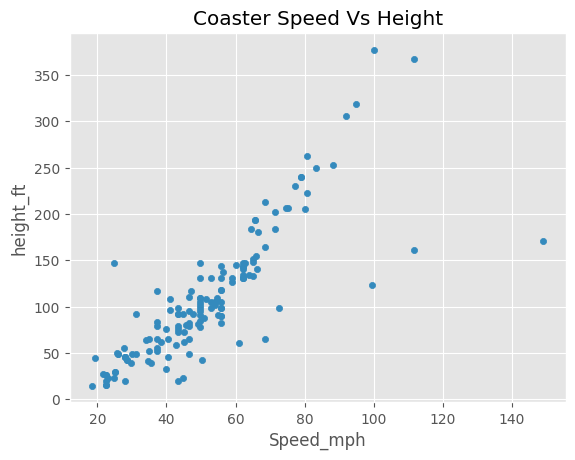

In [147]:
df.plot(kind='scatter', x='Speed_mph', y='height_ft', title='Coaster Speed Vs Height')
plt.show()

<Axes: xlabel='Speed_mph', ylabel='height_ft'>

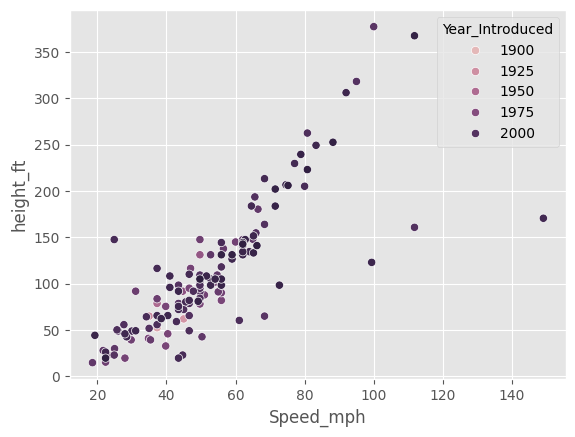

In [151]:
sns.scatterplot(x='Speed_mph', y='height_ft', data=df, hue='Year_Introduced')

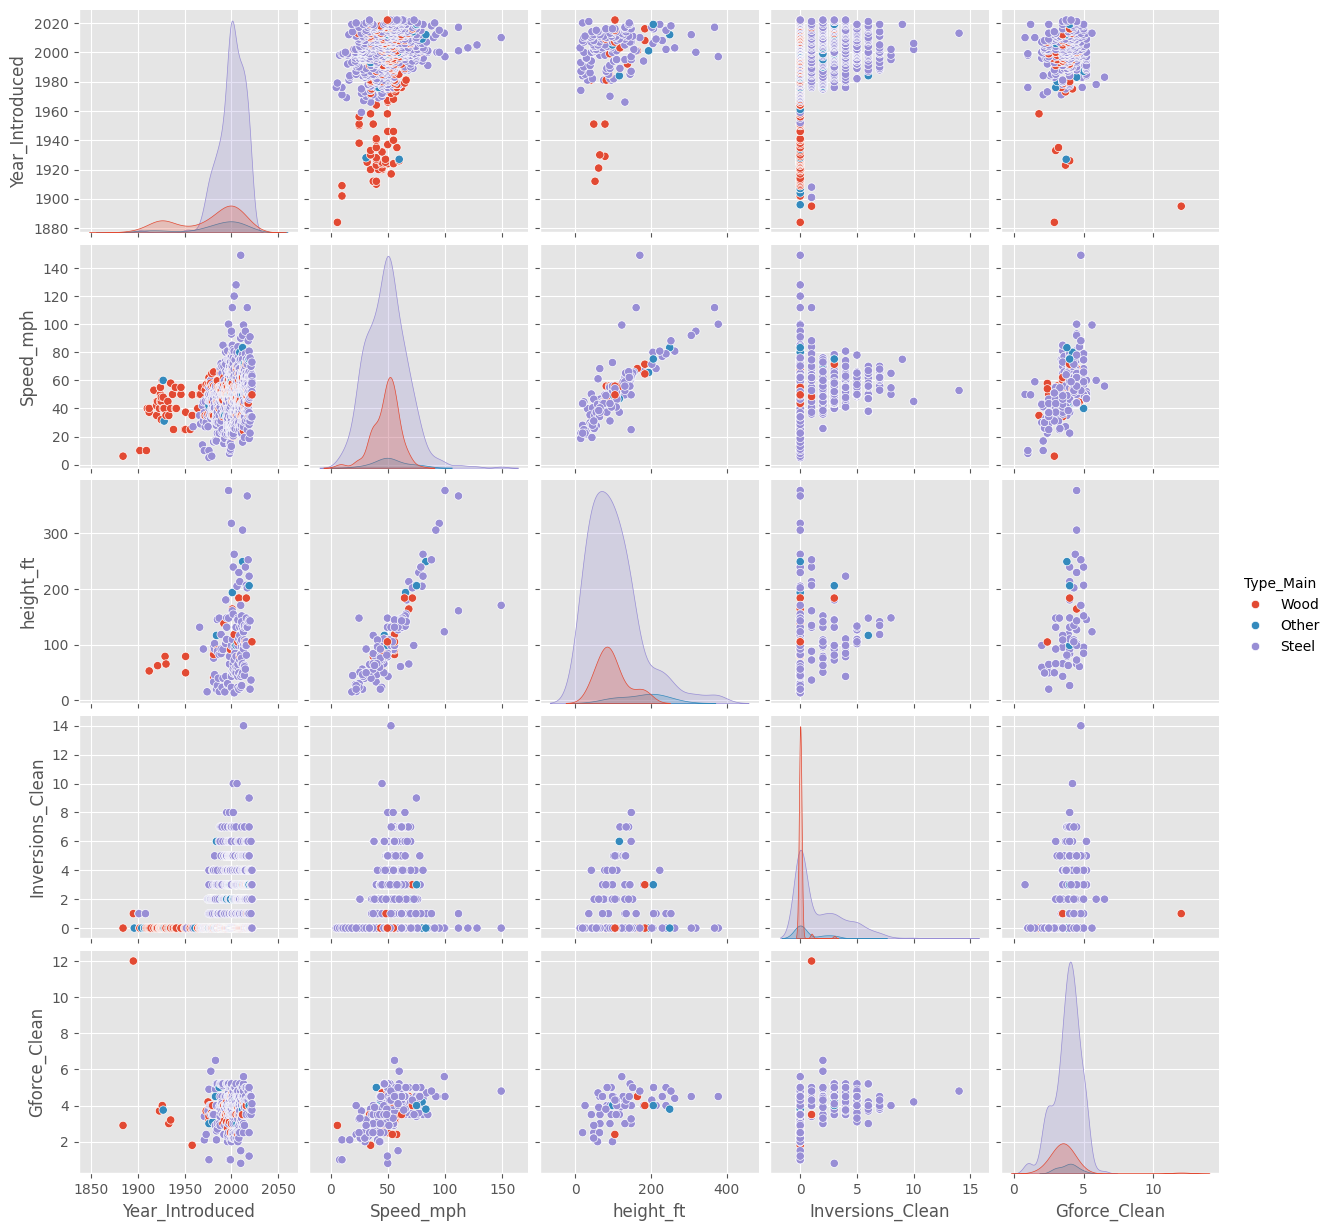

In [155]:
sns.pairplot(df, vars=['Year_Introduced','Speed_mph','height_ft','Inversions_Clean','Gforce_Clean'], hue='Type_Main')
plt.show()

In [157]:
#drop null values
df_corr = df[['Year_Introduced','Speed_mph','height_ft','Inversions_Clean','Gforce_Clean']].dropna().corr()
df_corr

,Year_Introduced,Speed_mph,height_ft,Inversions_Clean,Gforce_Clean
Year_Introduced,1.000000,0.171978,0.135413,-0.209887,0.160247
Speed_mph,0.171978,1.000000,0.733999,-0.028705,0.607383
height_ft,0.135413,0.733999,1.000000,-0.079736,0.466482
Inversions_Clean,-0.209887,-0.028705,-0.079736,1.000000,0.275991
Gforce_Clean,0.160247,0.607383,0.466482,0.275991,1.000000


<Axes: >

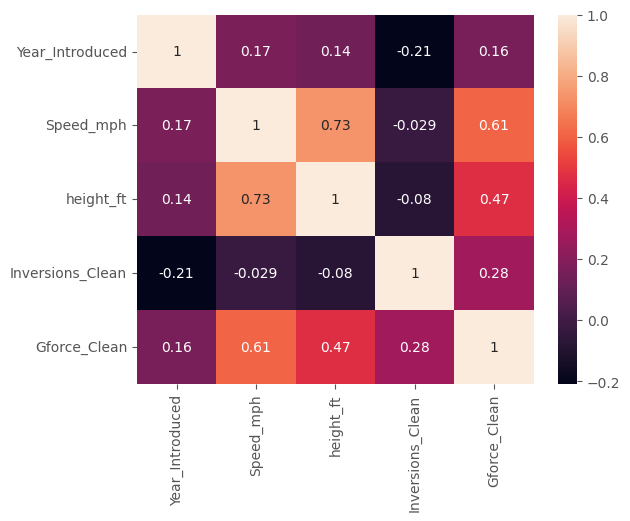

In [159]:
sns.heatmap(df_corr, annot=True)

### Parks with fastest rollecoasters with minimum of 10 coasters in that location

In [167]:
df.query('Location != "Other"') \
    .groupby('Location')['Speed_mph'] \
    .agg(['mean','count']) \
    .query('count >= 10')\
    .sort_values('mean')

,mean,count
Location,,
Alton Towers,42.791667,12
Carowinds,43.571429,14
Kings Island,49.273684,19
Hersheypark,50.576923,13
Kings Dominion,52.083333,12
Six Flags Great Adventure,53.036364,11
Canada's Wonderland,53.533333,12
Six Flags Magic Mountain,57.241176,17
Cedar Point,57.833333,18


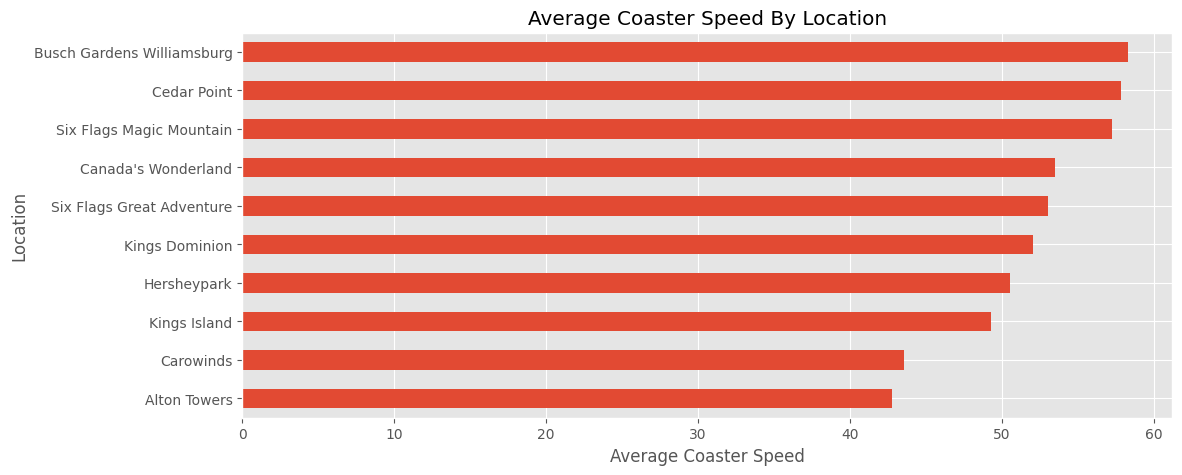

In [170]:
ax = df.query('Location != "Other"') \
    .groupby('Location')['Speed_mph'] \
    .agg(['mean','count']) \
    .query('count >= 10')\
    .sort_values('mean')['mean']\
    .plot(kind='barh', figsize=(12,5), title='Average Coaster Speed By Location')
ax.set_xlabel('Average Coaster Speed')
plt.show()